In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
data = pd.read_csv('data/pca_gsp.csv')

In [3]:
X = data.drop('State', axis=1)
X.head()

,Ag,Mining,Constr,Manuf,Manuf_nd,Transp,Comm,Energy,TradeW,TradeR,RE,Services,Govt
0,2.0,1.5,4.2,10.5,11.8,2.9,2.9,3.6,6.3,9.9,12.800000,16.100000,15.5
1,1.5,22.4,4.1,1.1,3.7,12.1,2.0,1.5,2.9,6.5,10.700000,11.900000,19.6
2,1.7,1.3,5.8,11.5,3.0,2.8,2.2,2.7,6.3,10.5,18.900000,20.200001,13.0
3,5.1,1.0,4.0,12.8,11.8,4.4,2.4,4.2,6.1,10.2,11.400000,14.800000,11.8
4,2.1,0.6,3.3,9.0,5.0,2.6,2.5,1.8,6.8,8.9,22.700001,23.100000,11.5


In [4]:
eigenvalues, eigenvectors = np.linalg.eig(np.corrcoef(X.transpose()))

In [5]:
eigenvalues_cov, eigenvectors_cov = np.linalg.eig(np.cov(X.transpose()))

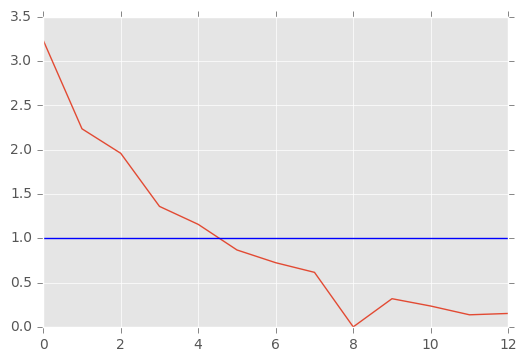

In [6]:
plt.plot(eigenvalues)
plt.axhline(1, color='b', linestyle='-')

# The Kaiser’s rule recommends retaining only factors with eigenvalues exceeding unity.
# Intuitively, this rule means that any retained factor should account for at least as much
# variation as any of the original variables.

#first eigenvalues above 1 correspond to 5 components

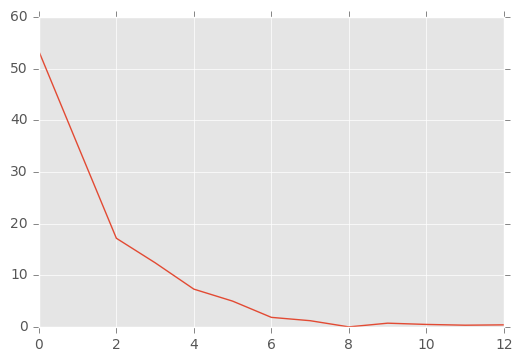

In [7]:
plt.plot(eigenvalues_cov)

In [8]:
from sklearn.decomposition import PCA, FactorAnalysis
pca = PCA(whiten=True).fit(X)

In [9]:
df = pd.DataFrame(eigenvalues)
df.rename(columns={0:'eigenvalues'}, inplace=True)
df['sqrt'] = np.sqrt(df['eigenvalues'])
df['var'] = pca.explained_variance_ratio_
df['var1'] = df['eigenvalues'] / sum(df['eigenvalues'])
df
# sum(df['eigenvalues']) == n_features

,eigenvalues,sqrt,var,var1
0,3.235511,1.798753,0.394031,0.248885
1,2.236461,1.495480,0.260126,0.172035
2,1.959838,1.399942,0.126711,0.150757
3,1.360350,1.166340,0.091690,0.104642
4,1.157421,1.075835,0.053978,0.089032
5,0.868334,0.931845,0.036834,0.066795
6,0.724486,0.851167,0.013618,0.055730
7,0.615779,0.784716,0.008864,0.047368
8,0.000069,0.008280,0.005304,0.000005
9,0.318237,0.564125,0.003514,0.024480


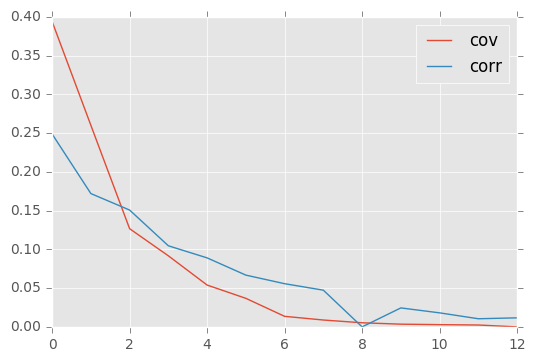

In [10]:
plt.plot(df['var'], label='cov')
plt.plot(df['var1'], label='corr')
plt.legend()
plt.show()

In [11]:
pd.DataFrame(eigenvectors_cov)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.049207,-0.093869,-0.196344,0.164879,-0.632056,0.484750,0.196231,-0.234900,0.276996,-0.256891,-0.123674,-0.158353,0.108528
1,0.724681,0.253685,0.200039,-0.463787,0.095221,0.019768,0.024631,-0.025158,0.277405,-0.121383,-0.209798,0.003047,0.094648
2,0.007572,0.014222,-0.112989,0.034169,0.095235,0.063806,0.113957,-0.322197,0.277756,0.279599,-0.181507,0.243440,-0.779960
3,-0.224378,-0.660148,-0.117870,-0.570929,-0.032512,-0.263031,-0.054714,-0.077204,0.274654,-0.131950,-0.013245,-0.038308,0.017892
4,-0.007398,-0.351204,0.698348,0.407327,0.275873,0.083973,-0.009532,-0.182666,0.277431,-0.145361,-0.044723,-0.010980,0.078492
5,0.165621,0.026606,-0.069903,0.055100,-0.119561,0.046513,-0.642223,-0.235669,0.280339,0.291410,0.556435,-0.009591,0.079174
6,-0.019060,0.040097,-0.028268,0.090294,0.067464,-0.004870,-0.156416,0.466861,0.272371,0.000835,-0.082154,-0.748929,-0.316616
7,0.068441,-0.024101,0.012614,-0.024625,0.050208,0.042627,0.610560,0.298922,0.278637,0.054830,0.660387,0.098781,-0.031308
8,-0.081940,-0.057462,-0.064765,0.053838,-0.018536,0.274613,-0.306669,0.611972,0.275308,-0.090701,-0.192161,0.563284,0.018548
9,-0.028123,-0.055276,-0.163886,0.116670,0.097092,-0.067693,0.201588,0.012182,0.285899,0.696693,-0.333310,-0.063666,0.467567


In [12]:
pd.DataFrame(pca.transform(X)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.317088,-0.845141,0.212734,1.156141,0.471957,-0.773358,-0.445096,-0.554589,-0.193407,0.471872,0.021569,0.225828,-0.265495
1,3.380282,1.369227,0.034702,-0.377405,-0.749771,-1.606059,3.726575,1.737894,0.339566,-1.653303,0.150740,0.334674,0.457669
2,-0.399145,0.265845,-0.896250,-0.775622,-0.165325,-0.634428,-0.345589,0.020512,1.939640,1.199101,1.038786,-0.792531,-0.707186
3,0.328575,-1.418537,0.144545,0.668344,-0.322804,0.815779,-0.438587,0.286300,1.204159,-1.159581,-0.751679,1.650099,0.366609
4,-0.833788,0.857873,-0.147211,-0.561765,-0.020574,0.259940,0.449598,0.059011,-0.721754,0.771476,-1.856308,0.506354,-0.914806


In [13]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.049207,0.724681,0.007572,-0.224378,-0.007398,0.165621,-0.019060,0.068441,-0.081940,-0.028123,-0.500510,-0.322101,0.166482
1,-0.093869,0.253685,0.014222,-0.660148,-0.351204,0.026606,0.040097,-0.024101,-0.057462,-0.055276,0.500229,0.317285,0.085660
2,-0.196344,0.200039,-0.112989,-0.117870,0.698348,-0.069903,-0.028268,0.012614,-0.064765,-0.163886,0.436375,-0.331821,-0.263927
3,0.164879,-0.463787,0.034169,-0.570929,0.407327,0.055100,0.090294,-0.024625,0.053838,0.116670,-0.230609,-0.057688,0.424098
4,-0.632056,0.095221,0.095235,-0.032512,0.275873,-0.119561,0.067464,0.050208,-0.018536,0.097092,-0.357093,0.579759,-0.102131
5,0.484750,0.019768,0.063806,-0.263031,0.083973,0.046513,-0.004870,0.042627,0.274613,-0.067693,-0.210797,0.231964,-0.708573
6,-0.196231,-0.024631,-0.113957,0.054714,0.009532,0.642223,0.156416,-0.610560,0.306669,-0.201588,-0.008808,0.009787,-0.016089
7,0.234900,0.025158,0.322197,0.077204,0.182666,0.235669,-0.466861,-0.298922,-0.611972,-0.012182,0.029292,0.249478,0.021046
8,-0.256891,-0.121383,0.279599,-0.131950,-0.145361,0.291410,0.000835,0.054830,-0.090701,0.696693,0.050992,-0.334670,-0.326217
9,0.123674,0.209798,0.181507,0.013245,0.044723,-0.556435,0.082154,-0.660387,0.192161,0.333310,0.027629,-0.040695,0.051459


In [14]:
#row equal to 1
print sum([j**2 for j in pd.DataFrame(pca.components_).ix[0,:]])

#col equal to eigenvalue
print sum([i**2 for i in pd.DataFrame(pca.components_).ix[:,0]])

sum([0.77**2, 0.75**2, 0.75**2, 0.68**2, 0.78**2])

1.0
1.0


2.7887